<a href="https://colab.research.google.com/github/practigol/trabajo_final/blob/main/Trabajo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de la pobreza en Argentina**

El objetivo de este trabajo es diseñar un modelo de aprendizaje automático que pueda predecir la pobreza en Argentina, a partir de los datos disponibles en la Encuesta Permanente de Hogares (https://www.indec.gob.ar/indec/web/Institucional-Indec-BasesDeDatos). 

Las bases de datos que se toman en este caso son las del último trimestre del año 2021.




In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import warnings

warnings.filterwarnings('ignore')

# **Creamos el dataset**

In [ ]:
#cargamos el archivo de individuos "usu_individual_T421.csv"

from google.colab import files
uploaded  = files.upload() 

In [ ]:
df_individual = pd.read_csv("usu_individual_T421.csv")

In [ ]:
df_individual.shape

(50154, 177)

In [ ]:
# le asignamos un % a cada persona que vive en el hogar según género y edad, en la variable 'AE_ctrol_ind'

condiciones = [
    (df_individual ['CH04'] >= 1) & (df_individual['CH06'] < 1),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 1),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 2),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 3),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 4),
    (df_individual['CH04'] >= 1 ) & ( df_individual['CH06'] == 5),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 6),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 7),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 8),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 9),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 10),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 11),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 12),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 13) & (df_individual['CH06'] <=14),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 15) & (df_individual['CH06'] <=17),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 18) & (df_individual['CH06'] <=29),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 30) & (df_individual['CH06'] <=45),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 46) & (df_individual['CH06'] <=60),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 61) & (df_individual['CH06'] <=75),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] > 75),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==10),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==11),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==12),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==13),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==14),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==15),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==16),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==17),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] >= 18) & (df_individual['CH06'] <=29),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] >= 30) & (df_individual['CH06'] <=45),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] >= 46) & (df_individual['CH06'] <=60),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] >= 61) & (df_individual['CH06'] <=75),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] > 75)   
    ]

opciones = [0.35,0.37,0.46,0.51,0.55,0.60,0.64,0.66,0.68,0.69,0.70,0.72,0.74,0.76,0.77,0.76,0.77,0.76,0.67,0.63,0.79,0.82,0.85,0.90,
            0.96,1.00,1.03,1.04,1.02,1.00,1.00,0.83,0.74]



In [ ]:
df_individual['AE_ctrol_ind']=np.select(condiciones,opciones)

In [ ]:
df_individual.head()

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,CH03,CH04,CH05,CH06,CH07,CH08,CH09,CH10,CH11,CH12,CH13,CH14,CH15,CH15_COD,CH16,CH16_COD,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,IMPUTA,PP02C1,PP02C2,PP02C3,PP02C4,PP02C5,PP02C6,PP02C7,PP02C8,PP02E,...,ADECOCUR,PONDIIO,TOT_P12,P47T,DECINDR,IDECINDR,RDECINDR,GDECINDR,PDECINDR,ADECINDR,PONDII,V2_M,V3_M,V4_M,V5_M,V8_M,V9_M,V10_M,V11_M,V12_M,V18_M,V19_AM,V21_M,T_VI,ITF,DECIFR,IDECIFR,RDECIFR,GDECIFR,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,AE_ctrol_ind
0,TQRMNOPPQHMOLPCDEGNFJ00714305,2021,4,1,4,1,44,N,17,309,3,1,2008-02-14 00:00:00,13,5,1,1,1,1,4,2,0.0,1,NaN,1,NaN,3,3,0,3,NaN,0,0,0,0,0,0,0,0,0,...,0,309,0,0.0,0,0.0,0,NaN,0.0,0,309,0,0,0,0,0,0,0,0,0,0,0,0,0,134000,8,9.0,7,NaN,9.0,7,33500.0,6,7.0,5,NaN,7.0,5,411,0.90
1,TQRMNOQPYHKMPUCDEIJAH00663642,2021,4,1,1,1,1,S,33,1573,1,1,1942-07-07 00:00:00,79,2,1,1,2,0,2,1,NaN,3,90.0,1,NaN,2,3,0,1,NaN,0,0,0,0,0,0,0,0,0,...,0,1573,0,35000.0,5,NaN,4,5.0,NaN,5,1954,35000,0,0,0,0,0,0,0,0,0,0,0,35000,64000,4,NaN,4,4.0,NaN,4,32000.0,6,NaN,6,6.0,NaN,6,2285,0.74
2,TQRMNOQPYHKMPUCDEIJAH00663642,2021,4,1,2,1,1,S,33,1573,2,2,1942-02-05 00:00:00,79,2,1,1,2,0,4,2,3.0,3,22.0,1,NaN,3,3,0,1,NaN,0,0,0,0,0,0,0,0,0,...,0,1573,0,29000.0,4,NaN,4,4.0,NaN,4,1960,29000,0,0,0,0,0,0,0,0,0,0,0,29000,64000,4,NaN,4,4.0,NaN,4,32000.0,6,NaN,6,6.0,NaN,6,2285,0.63
3,TQRMNOQYRHMOQRCDEIJAH00718661,2021,4,1,1,1,1,S,33,2635,1,1,1900-01-01 00:00:00,48,2,1,1,2,0,4,1,NaN,1,NaN,1,NaN,4,1,3,0,NaN,0,0,0,0,0,0,0,0,0,...,12,0,0,-9.0,12,NaN,12,12.0,NaN,12,0,0,0,0,4000,0,0,0,0,0,0,0,0,4000,0,12,NaN,12,12.0,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0,1.00
4,TQRMNOPSTHMMLPCDEFMDB00713515,2021,4,1,2,1,43,N,6,87,2,2,1900-01-01 00:00:00,65,2,1,1,2,0,4,1,NaN,1,NaN,1,NaN,4,3,0,1,NaN,0,0,0,0,0,0,0,0,0,...,0,87,0,26000.0,4,4.0,4,NaN,4.0,3,106,26000,0,0,0,0,0,0,0,0,0,0,0,26000,86000,6,7.0,7,NaN,7.0,7,43000.0,7,8.0,8,NaN,8.0,8,129,0.67


In [ ]:
#seleccionamos solo las columnas que nos interesan para este estudio (ver archivo "EPH_registro_4T2021.pdf")

df_personas = df_individual[['CODUSU','NRO_HOGAR','CH03','CH04','CH06','CH08','NIVEL_ED','CAT_OCUP','CAT_INAC','AE_ctrol_ind']]

In [ ]:
df_personas.head()

,CODUSU,NRO_HOGAR,CH03,CH04,CH06,CH08,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind
0,TQRMNOPPQHMOLPCDEGNFJ00714305,1,3,1,13,1,3,0,3,0.90
1,TQRMNOQPYHKMPUCDEIJAH00663642,1,1,1,79,1,2,0,1,0.74
2,TQRMNOQPYHKMPUCDEIJAH00663642,1,2,2,79,1,3,0,1,0.63
3,TQRMNOQYRHMOQRCDEIJAH00718661,1,1,1,48,1,4,3,0,1.00
4,TQRMNOPSTHMMLPCDEFMDB00713515,1,2,2,65,1,4,0,1,0.67


In [ ]:
#sumamos el % de cada persona que compone el hogar (las variables CODUSU y NRO_HOGAR identifican a cada hogar)

df_suma = df_personas.groupby(['CODUSU','NRO_HOGAR']).AE_ctrol_ind.sum()

In [ ]:
df_suma.head()

CODUSU                         NRO_HOGAR
TQRMNOPPQHJLKTCDEGNFJ00699079  1            1.40
TQRMNOPPQHJMKMCDEFKID00667054  1            1.77
TQRMNOPPQHJMKMCDEOJAH00697751  1            0.63
TQRMNOPPQHJMKTCDEHNHB00686535  1            2.19
TQRMNOPPQHJMLPCDEFNFF00670213  1            1.52
Name: AE_ctrol_ind, dtype: float64

In [ ]:
df_suma.shape

(17037,)

In [ ]:
#unimos los dos dataframes según las variables CODUSU y NRO_HOGAR

df_personas_suma = pd.merge(df_personas, df_suma, on=['CODUSU','NRO_HOGAR'])

In [ ]:
df_personas_suma.head()

,CODUSU,NRO_HOGAR,CH03,CH04,CH06,CH08,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind_x,AE_ctrol_ind_y
0,TQRMNOPPQHMOLPCDEGNFJ00714305,1,3,1,13,1,3,0,3,0.90,3.35
1,TQRMNOPPQHMOLPCDEGNFJ00714305,1,1,2,37,1,6,3,0,0.77,3.35
2,TQRMNOPPQHMOLPCDEGNFJ00714305,1,2,1,37,1,4,3,0,1.00,3.35
3,TQRMNOPPQHMOLPCDEGNFJ00714305,1,3,2,8,1,1,0,3,0.68,3.35
4,TQRMNOQPYHKMPUCDEIJAH00663642,1,1,1,79,1,2,0,1,0.74,1.37


In [ ]:
#renombramos las columnas

df_personas_suma = df_personas_suma.rename(columns={
     'CH03':'parentesco',
     'CH04':'genero',
     'CH06':'edad',
     'CH08':'cob_medica',
     'AE_ctrol_ind_x':'AE_ctrol_ind',
     'AE_ctrol_ind_y':'AE_ctrol_ind_sum'})

In [ ]:
df_personas_suma.head(2)

,CODUSU,NRO_HOGAR,parentesco,genero,edad,cob_medica,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind,AE_ctrol_ind_sum
0,TQRMNOPPQHMOLPCDEGNFJ00714305,1,3,1,13,1,3,0,3,0.90,3.35
1,TQRMNOPPQHMOLPCDEGNFJ00714305,1,1,2,37,1,6,3,0,0.77,3.35


In [ ]:
df_personas_suma.shape

(50154, 11)

In [ ]:
#seleccionamos solo los que cumplen la condición de jefes/as de hogar

df_personas_jefes = df_personas_suma.loc[df_personas_suma.loc[:, 'parentesco'] == 1]

In [ ]:
df_personas_jefes.head()

,CODUSU,NRO_HOGAR,parentesco,genero,edad,cob_medica,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind,AE_ctrol_ind_sum
1,TQRMNOPPQHMOLPCDEGNFJ00714305,1,1,2,37,1,6,3,0,0.77,3.35
4,TQRMNOQPYHKMPUCDEIJAH00663642,1,1,1,79,1,2,0,1,0.74,1.37
6,TQRMNOQYRHMOQRCDEIJAH00718661,1,1,1,48,1,4,3,0,1.00,4.24
12,TQRMNOPSTHMMLPCDEFMDB00713515,1,1,1,67,1,5,0,1,0.83,1.50
13,TQRMNOQQSHJMKUCDEHJGH00702130,1,1,2,76,1,6,0,1,0.63,1.63


In [ ]:
#comprobamos la cantidad de filas

df_personas_jefes.shape

(17037, 11)

In [ ]:
#cargamos el archivo de hogares "usu_hogar_T421.csv"

from google.colab import files
uploaded  = files.upload() 

Saving usu_hogar_T421.csv to usu_hogar_T421.csv


In [ ]:
df_hogares = pd.read_csv("usu_hogar_T421.csv")

In [ ]:
#comprobamos la cantidad de filas

df_hogares.shape

(17037, 88)

In [ ]:
#unimos los dos dataframes, que tienen la misma cantidad de filas, según las variables CODUSU y NRO_HOGAR

df_dataset = pd.merge(df_hogares, df_personas_jefes, on=['CODUSU','NRO_HOGAR'])

In [ ]:
#comprobamos la cantidad de filas

df_dataset.shape

(17037, 97)

In [ ]:
df_dataset.head(2)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,IV1_ESP,IV2,IV3,IV3_ESP,IV4,IV5,IV6,IV7,IV7_ESP,IV8,IV9,IV10,IV11,IV12_1,IV12_2,IV12_3,II1,II2,II3,II3_1,II4_1,II4_2,II4_3,II5,II5_1,II6,II6_1,II7,II7_ESP,II8,...,V14,V15,V16,V17,V18,V19_A,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,ITF,DECIFR,IDECIFR,RDECIFR,GDECIFR,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,parentesco,genero,edad,cob_medica,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind,AE_ctrol_ind_sum
0,TQRMNOQRPHMOKOCDEOJAH00714382,2021,4,1,1,44,N,93,116,1,NaN,1,1,NaN,4,1,1,1,NaN,1,1,1,1,2,2,2,1,1,2,0,1,2,2,2,0,2,0,1,NaN,1,...,2,2,2,2,2,2,2,3,2,1,0,12,12.0,12,NaN,12.0,12,0.0,12,12.0,12,NaN,12.0,12,0,1,0,98,0,0,0,1,2,38,1,6,3,0,0.77,2.10
1,TQRMNOQYUHMMKPCDEOJAH00714383,2021,4,1,1,44,N,93,46,1,NaN,4,1,NaN,2,1,1,1,NaN,1,1,1,1,2,2,2,4,2,2,0,1,2,1,2,0,2,0,3,NaN,1,...,2,2,2,2,2,2,2,2,0,2,0,12,12.0,12,NaN,12.0,12,0.0,12,12.0,12,NaN,12.0,12,0,1,0,98,0,0,0,1,2,64,1,6,0,1,0.67,1.44


In [ ]:
#df_dataset = df_dataset.drop(['Unnamed: 0'], axis=1)

In [ ]:
#la variable ITF representa el monto de ingreso total familiar
#a este monto lo dividimos por la suma de % de las personas que residen en el hogar para obtener el ingreso por adulto equivalente

df_dataset['adulto_equivalente']= df_dataset.apply(lambda row: row.ITF/row.AE_ctrol_ind_sum, axis=1)

In [ ]:
df_dataset['adulto_equivalente']= round(df_dataset['adulto_equivalente'], 2)

In [ ]:
df_dataset.head()

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,IV1_ESP,IV2,IV3,IV3_ESP,IV4,IV5,IV6,IV7,IV7_ESP,IV8,IV9,IV10,IV11,IV12_1,IV12_2,IV12_3,II1,II2,II3,II3_1,II4_1,II4_2,II4_3,II5,II5_1,II6,II6_1,II7,II7_ESP,II8,...,V15,V16,V17,V18,V19_A,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,ITF,DECIFR,IDECIFR,RDECIFR,GDECIFR,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,parentesco,genero,edad,cob_medica,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind,AE_ctrol_ind_sum,adulto_equivalente
0,TQRMNOQRPHMOKOCDEOJAH00714382,2021,4,1,1,44,N,93,116,1,NaN,1,1,NaN,4,1,1,1,NaN,1,1,1,1,2,2,2,1,1,2,0,1,2,2,2,0,2,0,1,NaN,1,...,2,2,2,2,2,2,3,2,1,0,12,12.0,12,NaN,12.0,12,0.0,12,12.0,12,NaN,12.0,12,0,1,0,98,0,0,0,1,2,38,1,6,3,0,0.77,2.10,0.00
1,TQRMNOQYUHMMKPCDEOJAH00714383,2021,4,1,1,44,N,93,46,1,NaN,4,1,NaN,2,1,1,1,NaN,1,1,1,1,2,2,2,4,2,2,0,1,2,1,2,0,2,0,3,NaN,1,...,2,2,2,2,2,2,2,0,2,0,12,12.0,12,NaN,12.0,12,0.0,12,12.0,12,NaN,12.0,12,0,1,0,98,0,0,0,1,2,64,1,6,0,1,0.67,1.44,0.00
2,TQRMNOPSWHMMKRCDEOJAH00714384,2021,4,1,1,44,N,93,43,1,NaN,3,1,NaN,1,1,1,1,NaN,1,1,1,1,2,2,2,3,1,2,0,1,1,2,2,0,2,0,1,NaN,1,...,1,1,2,2,2,2,2,0,2,77500,5,6.0,4,NaN,6.0,4,38750.0,7,7.0,5,NaN,7.0,5,57,1,2,98,0,0,0,1,1,72,1,2,0,1,0.83,1.50,51666.67
3,TQRMNOQYSHMNKTCDEOJAH00714386,2021,4,1,1,44,N,93,64,2,NaN,2,1,NaN,4,1,1,1,NaN,1,1,1,1,2,2,2,2,2,2,0,1,2,2,2,0,2,0,6,NaN,1,...,2,1,2,2,2,2,4,1,3,85000,6,6.0,5,NaN,6.0,5,21250.0,4,4.0,3,NaN,4.0,3,58,2,0,98,0,0,0,1,1,38,1,4,3,0,1.00,3.13,27156.55
4,TQRMNOQXVHLLPQCDEIJAH00718674,2021,4,1,1,1,S,33,2822,1,NaN,3,1,NaN,4,1,1,1,NaN,1,1,2,3,2,2,2,3,3,2,0,1,1,2,2,0,2,0,1,NaN,1,...,1,1,2,2,2,2,4,0,4,96870,7,NaN,6,7.0,NaN,7,24217.5,4,NaN,4,4.0,NaN,4,5658,1,2,98,0,0,0,1,1,67,1,4,3,0,0.83,3.33,29090.09


In [ ]:
#creamos la variable objetivo, pobreza

"""
De acuerdo con el archivo "canasta_01_22DEF7D4AE32.pdf", la canasta básica total para un adulto equivalente, para que 
no ingrese en la línea de pobreza, es de $24.643.

Creamos la varibale pobreza, donde todos los hogares que tengan ingresos menores a este valor son pobres. 
"""

df_dataset['pobreza'] = np.where(df_dataset['adulto_equivalente']<24643.00,1,0)


In [ ]:
df_dataset['pobreza'].value_counts()

0    9196
1    7841
Name: pobreza, dtype: int64

In [ ]:
df_dataset.head()

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,IV1_ESP,IV2,IV3,IV3_ESP,IV4,IV5,IV6,IV7,IV7_ESP,IV8,IV9,IV10,IV11,IV12_1,IV12_2,IV12_3,II1,II2,II3,II3_1,II4_1,II4_2,II4_3,II5,II5_1,II6,II6_1,II7,II7_ESP,II8,...,V16,V17,V18,V19_A,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,ITF,DECIFR,IDECIFR,RDECIFR,GDECIFR,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,parentesco,genero,edad,cob_medica,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind,AE_ctrol_ind_sum,adulto_equivalente,pobreza
0,TQRMNOQRPHMOKOCDEOJAH00714382,2021,4,1,1,44,N,93,116,1,NaN,1,1,NaN,4,1,1,1,NaN,1,1,1,1,2,2,2,1,1,2,0,1,2,2,2,0,2,0,1,NaN,1,...,2,2,2,2,2,3,2,1,0,12,12.0,12,NaN,12.0,12,0.0,12,12.0,12,NaN,12.0,12,0,1,0,98,0,0,0,1,2,38,1,6,3,0,0.77,2.10,0.00,1
1,TQRMNOQYUHMMKPCDEOJAH00714383,2021,4,1,1,44,N,93,46,1,NaN,4,1,NaN,2,1,1,1,NaN,1,1,1,1,2,2,2,4,2,2,0,1,2,1,2,0,2,0,3,NaN,1,...,2,2,2,2,2,2,0,2,0,12,12.0,12,NaN,12.0,12,0.0,12,12.0,12,NaN,12.0,12,0,1,0,98,0,0,0,1,2,64,1,6,0,1,0.67,1.44,0.00,1
2,TQRMNOPSWHMMKRCDEOJAH00714384,2021,4,1,1,44,N,93,43,1,NaN,3,1,NaN,1,1,1,1,NaN,1,1,1,1,2,2,2,3,1,2,0,1,1,2,2,0,2,0,1,NaN,1,...,1,2,2,2,2,2,0,2,77500,5,6.0,4,NaN,6.0,4,38750.0,7,7.0,5,NaN,7.0,5,57,1,2,98,0,0,0,1,1,72,1,2,0,1,0.83,1.50,51666.67,0
3,TQRMNOQYSHMNKTCDEOJAH00714386,2021,4,1,1,44,N,93,64,2,NaN,2,1,NaN,4,1,1,1,NaN,1,1,1,1,2,2,2,2,2,2,0,1,2,2,2,0,2,0,6,NaN,1,...,1,2,2,2,2,4,1,3,85000,6,6.0,5,NaN,6.0,5,21250.0,4,4.0,3,NaN,4.0,3,58,2,0,98,0,0,0,1,1,38,1,4,3,0,1.00,3.13,27156.55,0
4,TQRMNOQXVHLLPQCDEIJAH00718674,2021,4,1,1,1,S,33,2822,1,NaN,3,1,NaN,4,1,1,1,NaN,1,1,2,3,2,2,2,3,3,2,0,1,1,2,2,0,2,0,1,NaN,1,...,1,2,2,2,2,4,0,4,96870,7,NaN,6,7.0,NaN,7,24217.5,4,NaN,4,4.0,NaN,4,5658,1,2,98,0,0,0,1,1,67,1,4,3,0,0.83,3.33,29090.09,0


In [ ]:
df_dataset.to_csv('dataset.csv')

# **Cleaning**

In [ ]:
#from google.colab import files
#uploaded  = files.upload() 

Saving dataset.csv to dataset (1).csv


In [ ]:
#df_dataset = pd.read_csv("dataset.csv")

In [ ]:
#df_dataset = df_dataset.drop(['Unnamed: 0'], axis=1)

In [ ]:
# vemos los nombres de las columnas
col_names = df_dataset.columns

col_names

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION',
       'MAS_500', 'AGLOMERADO', 'PONDERA', 'IV1', 'IV1_ESP', 'IV2', 'IV3',
       'IV3_ESP', 'IV4', 'IV5', 'IV6', 'IV7', 'IV7_ESP', 'IV8', 'IV9', 'IV10',
       'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1',
       'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7',
       'II7_ESP', 'II8', 'II8_ESP', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3',
       'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10',
       'IX_MAYEQ10', 'ITF', 'DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR',
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2',
       'VII2_3', 'VII2_4', 'parentesco', 'genero', 'edad', 'cob_medica',
       'NIVEL_ED', 'CAT_OCUP', 'CAT_INAC', 'AE_ctrol_ind', 'AE_ctrol_ind_sum',
       'adulto

In [ ]:
#la variable ITF representa el monto de ingreso total familiar
#analizamos sus datos

print(round(df_dataset['ITF'].describe()),2)

count      17037.0
mean       68734.0
std        77324.0
min            0.0
25%        22000.0
50%        56000.0
75%        95600.0
max      4035000.0
Name: ITF, dtype: float64 2


In [ ]:
ITF_cero = [x for x in df_dataset['ITF'] if x == 0]
len(ITF_cero)

3582

In [ ]:
#hay 3.582 hogares que declararon ingresos $0. 
#para este estudio no los vamos a tener en cuenta

df_dataset = df_dataset.drop(df_dataset[df_dataset['ITF']==0].index)

In [ ]:
ITF_cero = [x for x in df_dataset['ITF'] if x == 0]
len(ITF_cero)

0

In [ ]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13455 entries, 2 to 17036
Data columns (total 99 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CODUSU              13455 non-null  object 
 1   ANO4                13455 non-null  int64  
 2   TRIMESTRE           13455 non-null  int64  
 3   NRO_HOGAR           13455 non-null  int64  
 4   REALIZADA           13455 non-null  int64  
 5   REGION              13455 non-null  int64  
 6   MAS_500             13455 non-null  object 
 7   AGLOMERADO          13455 non-null  int64  
 8   PONDERA             13455 non-null  int64  
 9   IV1                 13455 non-null  int64  
 10  IV1_ESP             29 non-null     object 
 11  IV2                 13455 non-null  int64  
 12  IV3                 13455 non-null  int64  
 13  IV3_ESP             27 non-null     object 
 14  IV4                 13455 non-null  int64  
 15  IV5                 13455 non-null  int64  
 16  IV6 

In [ ]:
#de todas las columnas que indican localización dejamos solo Aglomerado
#también quitamos año, trimestre y realizada
#la variable de ponderación
#todos los deciles
#el % individual del jefe/a que reside en el hogar

df_dataset = df_dataset.drop(['ANO4','TRIMESTRE','REALIZADA','REGION','MAS_500','PONDERA','DECIFR','IDECIFR','RDECIFR','GDECIFR','PDECIFR','ADECIFR','DECCFR','IDECCFR','RDECCFR','GDECCFR','PDECCFR','ADECCFR','PONDIH','AE_ctrol_ind'], axis=1)

In [ ]:
df_dataset.shape

(13455, 79)

In [ ]:
df_dataset.sort_values(by=['adulto_equivalente'])

,CODUSU,NRO_HOGAR,AGLOMERADO,IV1,IV1_ESP,IV2,IV3,IV3_ESP,IV4,IV5,IV6,IV7,IV7_ESP,IV8,IV9,IV10,IV11,IV12_1,IV12_2,IV12_3,II1,II2,II3,II3_1,II4_1,II4_2,II4_3,II5,II5_1,II6,II6_1,II7,II7_ESP,II8,II8_ESP,II9,V1,V2,V21,V22,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19_A,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,ITF,IPCF,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,parentesco,genero,edad,cob_medica,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind_sum,adulto_equivalente,pobreza
11385,TQRMNORUVHKMKQCDEIJAH00719321,1,33,1,NaN,2,1,NaN,4,1,1,2,NaN,1,1,1,3,2,1,2,2,2,2,0,1,2,2,2,0,2,0,1,NaN,2,NaN,1,9,9,2,2,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,6,2,4,1000,166.67,9,9,9,9,9,9,1,1,23,4,4,2,0,4.29,233.10,1
2856,TQRMNORSYHKMLPCDEHJGH00683376,1,23,1,NaN,5,2,NaN,4,2,1,1,NaN,1,1,1,1,2,2,2,5,4,2,0,1,2,2,2,0,2,0,1,NaN,2,NaN,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,1,1,2,2,2,4,1,3,1800,450.00,1,0,98,0,0,0,1,2,53,4,2,3,0,3.01,598.01,1
8570,TQRMNORSPHKMLQCDEIJAH00663348,1,33,1,NaN,1,2,NaN,2,2,1,1,NaN,1,1,2,3,2,2,2,1,1,2,0,2,2,2,0,0,0,0,1,NaN,2,NaN,1,1,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,1,900,900.00,1,0,98,0,0,0,1,1,52,4,3,2,0,1.00,900.00,1
6381,TQRMNOQYWHMNQMCDEIJAH00719056,1,33,2,NaN,2,1,NaN,4,1,1,1,NaN,1,1,1,2,2,2,2,2,1,2,0,1,2,1,2,0,2,0,1,NaN,1,NaN,1,2,2,2,2,2,2,2,2,2,1,2,2,2,2,1,2,2,2,2,2,2,2,1,0,1,1100,1100.00,1,0,98,0,0,0,1,1,62,4,2,0,2,0.83,1325.30,1
1430,TQRMNOPUTHMNLNCDEGGFB00715713,1,10,1,NaN,3,1,NaN,1,1,1,1,NaN,1,1,1,1,2,2,2,3,2,2,0,1,1,2,2,0,2,0,3,NaN,1,NaN,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,4,0,4,4800,1200.00,1,0,2,3,4,0,1,2,32,1,3,3,0,3.43,1399.42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15894,TQRMNORUQHJLLMCDEGJBF00675410,1,13,1,NaN,3,1,NaN,1,2,1,1,NaN,1,1,1,1,2,2,2,3,1,2,0,1,1,2,2,0,2,0,3,NaN,1,NaN,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,0,1,680000,680000.00,1,0,98,0,0,0,1,1,61,1,5,3,0,0.83,819277.11,0
5351,TQRMNOPWSHKLOUCDEIJAH00663632,1,33,1,NaN,4,1,NaN,1,1,1,1,NaN,1,1,1,1,2,2,2,4,1,2,0,1,1,1,2,0,2,0,1,NaN,1,NaN,1,1,2,2,2,2,2,2,2,2,2,2,1,2,2,1,2,2,1,2,2,2,2,1,0,1,750000,750000.00,96,0,98,0,0,0,1,1,65,12,4,3,0,0.83,903614.46,0
5094,TQRMNORUUHLMMOCDEFKID00714779,1,4,1,NaN,3,1,NaN,2,1,1,1,NaN,1,1,1,2,2,2,2,3,2,2,0,1,1,1,2,0,2,0,3,NaN,1,NaN,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,3,1,2,2301000,767000.00,96,0,1,2,0,0,1,1,43,1,5,1,0,2.37,970886.08,0
484,TQRMNOQUYHJOKMCDEIIAD00718213,1,32,2,NaN,4,1,NaN,9,1,1,1,NaN,1,1,1,1,2,2,2,4,1,2,0,1,1,2,2,0,2,0,1,NaN,4,ELECTRICIDAD,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,1,770000,770000.00,96,0,98,0,0,0,1,2,87,1,4,0,1,0.63,1222222.22,0


**Nulos**

In [ ]:
pd.set_option('max_rows', 80)
pd.set_option('max_columns', 80)
pd.set_option('display.width', 80)
pd.set_option('display.max_colwidth', 80)

In [ ]:
nulos = df_dataset.isnull().sum()

In [ ]:
nulos

CODUSU                    0
NRO_HOGAR                 0
AGLOMERADO                0
IV1                       0
IV1_ESP               13426
IV2                       0
IV3                       0
IV3_ESP               13428
IV4                       0
IV5                       0
IV6                       0
IV7                       0
IV7_ESP               13438
IV8                       0
IV9                       0
IV10                      0
IV11                      0
IV12_1                    0
IV12_2                    0
IV12_3                    0
II1                       0
II2                       0
II3                       0
II3_1                     0
II4_1                     0
II4_2                     0
II4_3                     0
II5                       0
II5_1                     0
II6                       0
II6_1                     0
II7                       0
II7_ESP               13436
II8                       0
II8_ESP               13348
II9                 

In [ ]:
# vemos que las variables que tienen valores nulos son 
#IV1_ESP, IV3_ESP, IV7_ESP, II7_ESP, II8_ESP

#analizamos la cantidad que hay en cada una de ellas

df_dataset[['IV1_ESP','IV3_ESP','IV7_ESP','II7_ESP','II8_ESP']].notnull().sum()


IV1_ESP     29
IV3_ESP     27
IV7_ESP     17
II7_ESP     19
II8_ESP    107
dtype: int64

In [ ]:
"""
La variable IV1 refiere al tipo de vivienda y tiene los valores desde el 1 al 6. 
Este último refiere a "otro" y en IV1_ESP se especifica la misma.

La variable IV3 identifica los pisos y va los valores desde el 1 al 4. 
Este último refiere a "otro" y en IV3_ESP se especifica la misma.

La variable IV7 es la fuente del agua y va del 1 al 4. 
Este último refiere a "otro" y en IV_ESP se especifica la misma.

a variable II7 es el régimen de tenencia de la propiedad y va del 1 al 9. 
Este último refiere a "otro" y en II7_ESP se especifica la misma.
"""
# dada la escasa cantidad de valores presentes en estas variables no las vamos a tener en cuenta en este estudio

df_dataset = df_dataset.drop(['IV1_ESP','IV3_ESP','IV7_ESP','II7_ESP'], axis=1)

In [ ]:
df_dataset.shape

(13455, 75)

In [ ]:
"""
La variable II8 es el combustible usado para cocina y va del 1 al 4. 
Este último refiere a "otro" y en II8_ESP se especifica la misma.
"""
# chequeamos cuántas veces aparece un valor en II8

df_dataset['II8'].value_counts()

1    8475
2    4822
4     107
3      40
0      11
Name: II8, dtype: int64

Vemos que hay filas con valores 0, los cuales vamos a cambiar por la mediana o la moda

In [ ]:
df_dataset['II8_ESP'].value_counts()

ELECTRICIDAD                                     29
electricidad                                     25
ELECTRICO                                        17
ELECTRICA                                         6
cocina electrica                                  4
electrico                                         4
COCINA ELECTRICA                                  3
Electrica                                         2
electrica                                         2
COME EN LA CASA DE SU MADRE                       1
electricista                                      1
calentador                                        1
CALENTADOR ELECTRICO                              1
zepelin                                           1
UTILIZAR GAS DE RED EN OTRA VIVIENDA              1
utiliza la cocina de la madre                     1
NO COCINA SU FAMILIA LE ALCANZA LA COMIDA O L     1
olla electrica                                    1
electico                                          1
electricO   

In [ ]:
condiciones = [
    (df_dataset['II8_ESP'] == 'ELECTRICIDAD') | (df_dataset['II8_ESP'] == 'electricidad') | (df_dataset['II8_ESP'] == 'ELECTRICO'),
    (df_dataset['II8_ESP'] == 'ELECTRICA') | (df_dataset['II8_ESP'] == 'cocina electrica') | (df_dataset['II8_ESP'] == 'electrico'),
    (df_dataset['II8_ESP'] == 'COCINA ELECTRICA') | (df_dataset['II8_ESP'] == 'Electrica') | (df_dataset['II8_ESP'] == 'electrica'),
    (df_dataset['II8_ESP'] == 'COME EN LA CASA DE SU MADRE'),
    (df_dataset['II8_ESP'] == 'electricista') | (df_dataset['II8_ESP'] == 'calentador') | (df_dataset['II8_ESP'] == 'CALENTADOR ELECTRICO'),
    (df_dataset['II8_ESP'] == 'zepelin'),
    (df_dataset['II8_ESP'] == 'UTILIZAR GAS DE RED EN OTRA VIVIENDA') | (df_dataset['II8_ESP'] == 'utiliza la cocina de la madre'),
    (df_dataset['II8_ESP'] == 'olla electrica') | (df_dataset['II8_ESP'] == 'electico') | (df_dataset['II8_ESP'] == 'electricO'),  
    (df_dataset['II8_ESP'] == 'garrafa a granel'),  
    (df_dataset['II8_ESP'] == 'electricidad '),  
    (df_dataset['II8_ESP'] == 'ANAFE') | (df_dataset['II8_ESP'] == 'NO COCINA'), 
    ]

opciones = [5,5,5,4,5,4,1,5,2,5,4]

In [ ]:
df_dataset['II8_ESP']=np.select(condiciones,opciones)

In [ ]:
condiciones8 = [
    (df_dataset['II8'] == 0),
    (df_dataset['II8'] == 1),
    (df_dataset['II8'] == 2),
    (df_dataset['II8'] == 3),
    (df_dataset['II8'] == 4) & (df_dataset['II8_ESP'] == 0),
    (df_dataset['II8'] == 4) & (df_dataset['II8_ESP'] == 1),
    (df_dataset['II8'] == 4) & (df_dataset['II8_ESP'] == 2),
    (df_dataset['II8'] == 4) & (df_dataset['II8_ESP'] == 4),
    (df_dataset['II8'] == 4) & (df_dataset['II8_ESP'] == 5)
   
    ]

opciones8 = [0,1,2,3,4,1,2,0,4]

In [ ]:
df_dataset['II8']=np.select(condiciones8,opciones8)

In [ ]:
df_dataset['II8'].value_counts()

1    8477
2    4823
4     100
3      40
0      15
Name: II8, dtype: int64

In [ ]:
# borramos la variable II8_ESP

df_dataset = df_dataset.drop(['II8_ESP'], axis=1)

**Variables numéricas**

In [ ]:
#Analizamos las variables numéricas

numerical = [var for var in df_dataset.columns if df_dataset[var].dtype!='O']
# view summary statistics in numerical variables
print(round(df_dataset[numerical].describe()),2)

       NRO_HOGAR  AGLOMERADO      IV1      IV2      IV3      IV4      IV5  \
count    13455.0     13455.0  13455.0  13455.0  13455.0  13455.0  13455.0   
mean         1.0        25.0      1.0      3.0      1.0      3.0      1.0   
std          2.0        20.0      0.0      1.0      0.0      2.0      0.0   
min          1.0         2.0      1.0      1.0      1.0      1.0      1.0   
25%          1.0        12.0      1.0      2.0      1.0      1.0      1.0   
50%          1.0        22.0      1.0      3.0      1.0      2.0      1.0   
75%          1.0        32.0      1.0      4.0      1.0      4.0      1.0   
max         72.0        93.0      6.0     99.0      4.0      9.0      2.0   

           IV6      IV7      IV8      IV9     IV10     IV11   IV12_1   IV12_2  \
count  13455.0  13455.0  13455.0  13455.0  13455.0  13455.0  13455.0  13455.0   
mean       1.0      1.0      1.0      1.0      1.0      1.0      2.0      2.0   
std        0.0      0.0      0.0      0.0      0.0      1.0    

In [ ]:
#analizamos la mediana

df_dataset[numerical].median()

NRO_HOGAR                 1.00
AGLOMERADO               22.00
IV1                       1.00
IV2                       3.00
IV3                       1.00
IV4                       2.00
IV5                       1.00
IV6                       1.00
IV7                       1.00
IV8                       1.00
IV9                       1.00
IV10                      1.00
IV11                      1.00
IV12_1                    2.00
IV12_2                    2.00
IV12_3                    2.00
II1                       3.00
II2                       2.00
II3                       2.00
II3_1                     0.00
II4_1                     1.00
II4_2                     2.00
II4_3                     2.00
II5                       2.00
II5_1                     0.00
II6                       2.00
II6_1                     0.00
II7                       1.00
II8                       1.00
II9                       1.00
V1                        1.00
V2                        2.00
V21     

In [ ]:
#analizamos la moda

df_dataset[numerical].mode()

,NRO_HOGAR,AGLOMERADO,IV1,IV2,IV3,IV4,IV5,IV6,IV7,IV8,IV9,IV10,IV11,IV12_1,IV12_2,IV12_3,II1,II2,II3,II3_1,II4_1,II4_2,II4_3,II5,II5_1,II6,II6_1,II7,II8,II9,V1,V2,V21,V22,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19_A,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,ITF,IPCF,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,parentesco,genero,edad,cob_medica,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind_sum,adulto_equivalente,pobreza
0,1,33,1,3,1,4,1,1,1,1,1,1,1,2,2,2,3,1,2,0,1,2,2,2,0,2,0,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,0,2,50000,25000.0,1,0,98,0,0,0,1,1,50,1,4,3,0,1.0,50000.0,0


**Columnas que tienen valores 0 (que no corresponde)**

In [ ]:
# buscamos las variables que tienen como mínimo 0

minimo_cero = [var for var in df_dataset.columns if df_dataset[var].min() == 0]

print('Hay {} variables con mínimo cero\n'.format(len(minimo_cero)))

print('Las variables con mínimo cero son:', minimo_cero)

Hay 25 variables con mínimo cero

Las variables con mínimo cero son: ['IV9', 'IV10', 'IV11', 'II1', 'II2', 'II3', 'II3_1', 'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7', 'II8', 'II9', 'IX_MEN10', 'VII1_2', 'VII2_2', 'VII2_3', 'VII2_4', 'CAT_OCUP', 'CAT_INAC', 'pobreza']


In [ ]:
"""
De éstas, las variables que no deberían tener valores = 0 son:
'IV9', 'IV10', 'IV11'
'II4_1', 'II4_2', 'II4_3'
'II5'
'II6'
'II7', 'II8', 'II9'
'CAT_OCUP' (en esta el 9 equivale a Ns/Nc)
"""

#cambiamos el 0 por 9 en CAT_OCUP

df_dataset['CAT_OCUP'] = df_dataset['CAT_OCUP'].replace([0],9)


In [ ]:
df_dataset['CAT_OCUP'].value_counts()

3    6107
9    4932
2    2042
1     364
4      10
Name: CAT_OCUP, dtype: int64

In [ ]:
# las seleccionamos (excepto CAT_OCUP)

minimo_cero = df_dataset[['CODUSU','NRO_HOGAR','IV9','IV10','IV11','II4_1','II4_2','II4_3','II5','II6','II7','II8','II9']]

In [ ]:
(minimo_cero==0).sum()

CODUSU         0
NRO_HOGAR      0
IV9           41
IV10          41
IV11          41
II4_1         11
II4_2         11
II4_3         11
II5          815
II6          815
II7           11
II8           15
II9           11
dtype: int64

In [ ]:
minimo_cero.median()

NRO_HOGAR    1.0
IV9          1.0
IV10         1.0
IV11         1.0
II4_1        1.0
II4_2        2.0
II4_3        2.0
II5          2.0
II6          2.0
II7          1.0
II8          1.0
II9          1.0
dtype: float64

In [ ]:
minimo_cero.mode()

,CODUSU,NRO_HOGAR,IV9,IV10,IV11,II4_1,II4_2,II4_3,II5,II6,II7,II8,II9
0,TQRMNORSYHLNLTCDEHJGH00717147,1,1,1,1,1,2,2,2,2,1,1,1


In [ ]:
#reemplazamos los valores cero por la moda

for x in minimo_cero.columns:
  minimo_cero[x] = minimo_cero[x].replace([0],minimo_cero[x].mode())  

In [ ]:
minimo_cero.describe()

,NRO_HOGAR,IV9,IV10,IV11,II4_1,II4_2,II4_3,II5,II6,II7,II8,II9
count,13455.000000,13455.000000,13455.000000,13455.000000,13455.000000,13455.000000,13455.000000,13455.000000,13455.000000,13455.000000,13455.000000,13455.000000
mean,1.081011,1.028614,1.040654,1.248086,1.087402,1.546265,1.677220,1.994649,1.990115,1.936455,1.386696,1.039391
std,1.564948,0.167170,0.206330,0.536458,0.282434,0.497873,0.467557,0.072958,0.098933,1.602331,0.536398,0.269494
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000
max,72.000000,3.000000,3.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,9.000000,4.000000,4.000000


In [ ]:
#borramos las columnas que corregimos del dataset

df_dataset = df_dataset.drop(['IV9','IV10','IV11','II4_1','II4_2','II4_3','II5','II6','II7','II8','II9'], axis=1)

In [ ]:
#unimos el dataset con las columnas corregidas, por CODUSU y NRO HOGAR

df_dataset_corregido = pd.merge(df_dataset, minimo_cero, on=['CODUSU','NRO_HOGAR']) 

In [ ]:
df_dataset_corregido.head()

,CODUSU,NRO_HOGAR,AGLOMERADO,IV1,IV2,IV3,IV4,IV5,IV6,IV7,IV8,IV12_1,IV12_2,IV12_3,II1,II2,II3,II3_1,II5_1,II6_1,V1,V2,V21,V22,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19_A,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,ITF,IPCF,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,parentesco,genero,edad,cob_medica,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind_sum,adulto_equivalente,pobreza,IV9,IV10,IV11,II4_1,II4_2,II4_3,II5,II6,II7,II8,II9
0,TQRMNOPSWHMMKRCDEOJAH00714384,1,93,1,3,1,1,1,1,1,1,2,2,2,3,1,2,0,0,0,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,0,2,77500,38750.00,1,2,98,0,0,0,1,1,72,1,2,9,1,1.50,51666.67,0,1,1,1,1,1,2,2,2,1,1,1
1,TQRMNOQYSHMNKTCDEOJAH00714386,1,93,2,2,1,4,1,1,1,1,2,2,2,2,2,2,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,4,1,3,85000,21250.00,2,0,98,0,0,0,1,1,38,1,4,3,0,3.13,27156.55,0,1,1,1,1,2,2,2,2,6,1,1
2,TQRMNOQXVHLLPQCDEIJAH00718674,1,33,1,3,1,4,1,1,1,1,2,2,2,3,3,2,0,0,0,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,1,2,2,2,2,4,0,4,96870,24217.50,1,2,98,0,0,0,1,1,67,1,4,3,0,3.33,29090.09,0,1,2,3,1,1,2,2,2,1,1,1
3,TQRMNORWPHLKPRCDEIJAH00718675,1,33,2,2,1,9,1,1,1,1,2,1,2,2,1,2,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,2,2,2,2,0,2,90000,45000.00,1,2,98,0,0,0,1,1,35,1,5,3,0,1.77,50847.46,0,1,1,1,1,2,1,2,2,1,1,1
4,TQRMNOPWQHKLOUCDEIJAH00714088,1,33,1,3,1,1,1,1,1,1,2,2,2,3,2,2,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,1,2,2,2,2,3,0,3,92000,30666.67,2,1,98,0,0,0,1,2,33,1,6,3,0,2.54,36220.47,0,1,1,1,1,1,1,2,2,1,1,1


**Outliers**

In [ ]:
#En análisis de las variables numéricas vimos que IV2 e II1 tienen un máximo que quizás esté fuera de rango

#IV2 es la cantidad de habitaciones por hogar

df_dataset_corregido['IV2'].value_counts()

3     4971
2     3237
4     2856
1     1089
5      904
6      280
7       78
8       28
9        6
10       3
21       1
99       1
13       1
Name: IV2, dtype: int64

Text(0.5, 1.0, 'Boxplot de cantidad de ambientes por hogar')

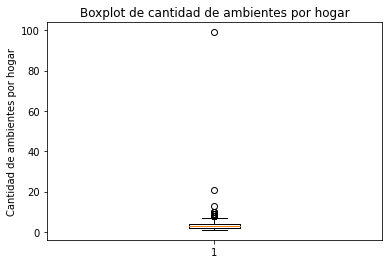

In [ ]:
plt.boxplot(df_dataset_corregido['IV2'])
plt.ylabel("Cantidad de ambientes por hogar")
plt.title("Boxplot de cantidad de ambientes por hogar")

In [ ]:
#acotamos el rango de 1 a 10

df_dataset_corregido['IV2'] = df_dataset_corregido['IV2'].clip(lower=1,upper = 10)

In [ ]:
df_dataset_corregido['IV2'].describe()

count    13455.000000
mean         3.046005
std          1.188822
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: IV2, dtype: float64

In [ ]:
#II1 es la cantidad de habitaciones que usan para dormir por hogar

df_dataset_corregido['II1'].value_counts()

3     4937
2     3303
4     2780
1     1190
5      878
6      251
7       70
8       22
0       11
9        7
10       3
47       1
42       1
13       1
Name: II1, dtype: int64

Text(0.5, 1.0, 'Boxplot de cantidad de ambientes que usan para dormir por hogar')

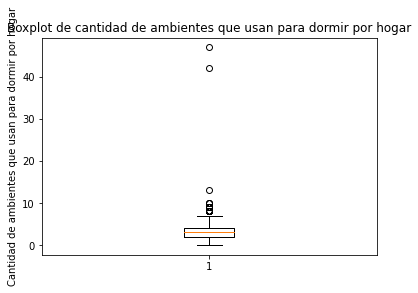

In [ ]:
plt.boxplot(df_dataset_corregido['II1'])
plt.ylabel("Cantidad de ambientes que usan para dormir por hogar")
plt.title("Boxplot de cantidad de ambientes que usan para dormir por hogar")

In [ ]:
#acotamos el rango de 1 a 10

df_dataset_corregido['II1'] = df_dataset_corregido['II1'].clip(lower=1,upper = 10)

In [ ]:
df_dataset_corregido['II1'].describe()

count    13455.000000
mean         3.004311
std          1.184414
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: II1, dtype: float64

In [ ]:
df_dataset_corregido.to_csv('dataset_corregido.csv')

# **Modelo**

En esta primera instancia implementaremos una regresión logística

# **Experimento 1:**

In [ ]:
#from google.colab import files
#uploaded  = files.upload() 

Saving dataset_corregido.csv to dataset_corregido.csv


In [ ]:
#df_dataset_corregido = pd.read_csv("dataset_corregido.csv")

In [ ]:
# Buscamos las variables categóricas
categorical = [var for var in df_dataset_corregido.columns if df_dataset_corregido[var].dtype=='O']
print('Hay {} variables categóricas\n'.format(len(categorical)))
print('Las variables categórica son:', categorical)

Hay 1 variables categóricas

Las variables categórica son: ['CODUSU']


In [ ]:
#borramos CODUSU y Nro de hogar
df = df_dataset_corregido.drop(['CODUSU','NRO_HOGAR'], axis=1)

In [ ]:
#df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df.head()

,AGLOMERADO,IV1,IV2,IV3,IV4,IV5,IV6,IV7,IV8,IV12_1,...,IV10,IV11,II4_1,II4_2,II4_3,II5,II6,II7,II8,II9
0,93,1,3,1,1,1,1,1,1,2,...,1,1,1,1,2,2,2,1,1,1
1,93,2,2,1,4,1,1,1,1,2,...,1,1,1,2,2,2,2,6,1,1
2,33,1,3,1,4,1,1,1,1,2,...,2,3,1,1,2,2,2,1,1,1
3,33,2,2,1,9,1,1,1,1,2,...,1,1,1,2,1,2,2,1,1,1
4,33,1,3,1,1,1,1,1,1,2,...,1,1,1,1,1,2,2,1,1,1


In [ ]:
#creamos la variable objetivo
df['pobreza'].value_counts()

0    9196
1    4259
Name: pobreza, dtype: int64

In [ ]:
X = df.drop(['pobreza'], axis=1)
y = df['pobreza']

In [ ]:
# dividir X e y en sets de entrenamiento y de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# comprobar X_train y X_test
X_train.shape, X_test.shape

((9418, 71), (4037, 71))

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

,AGLOMERADO,IV1,IV2,IV3,IV4,IV5,IV6,IV7,IV8,IV12_1,...,IV10,IV11,II4_1,II4_2,II4_3,II5,II6,II7,II8,II9
count,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,...,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000
mean,0.246373,0.040476,0.225195,0.039888,0.238612,0.134954,0.010830,0.010724,0.002867,0.942238,...,0.019749,0.084094,0.087280,0.551709,0.680824,0.993948,0.990019,0.117979,0.129150,0.013308
std,0.217203,0.093730,0.130666,0.117902,0.250066,0.341693,0.079083,0.066006,0.053469,0.233305,...,0.101923,0.180150,0.282259,0.497345,0.466182,0.077564,0.099410,0.200777,0.177399,0.089770
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.109890,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.219780,0.000000,0.222222,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.329670,0.000000,0.333333,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.250000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# entrenamos un modelo de regresión logística en el conjunto de entrenamiento
from sklearn.linear_model import LogisticRegression

# instanciamos el modelo
logreg = LogisticRegression(solver='liblinear', random_state=0)

# ajustamos el modelo
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
# probabilidad de obtener la salida como 0 - sin probreza
logreg.predict_proba(X_test)[:,0]

array([0.85538865, 0.60767034, 0.85006435, ..., 0.93252727, 0.88002528,
       0.45132463])

In [ ]:
# probabilidad de obtener la salida como 1 - pobreza
logreg.predict_proba(X_test)[:,1]

array([0.14461135, 0.39232966, 0.14993565, ..., 0.06747273, 0.11997472,
       0.54867537])

### **Métricas**

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8526


**Matriz de confusión**

In [ ]:
# Matriz de confusión 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2617  186]
 [ 409  825]]

True Positives(TP) =  2617

True Negatives(TN) =  825

False Positives(FP) =  186

False Negatives(FN) =  409


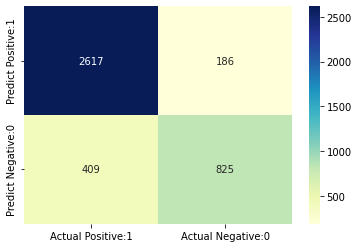

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Podemos ver que la matriz de confusión está desbalanceada, por lo que vamos a proceder a balancear la misma. 

**Balancear matriz de confusión**

In [ ]:
df.head()

,AGLOMERADO,IV1,IV2,IV3,IV4,IV5,IV6,IV7,IV8,IV12_1,...,IV10,IV11,II4_1,II4_2,II4_3,II5,II6,II7,II8,II9
0,93,1,3,1,1,1,1,1,1,2,...,1,1,1,1,2,2,2,1,1,1
1,93,2,2,1,4,1,1,1,1,2,...,1,1,1,2,2,2,2,6,1,1
2,33,1,3,1,4,1,1,1,1,2,...,2,3,1,1,2,2,2,1,1,1
3,33,2,2,1,9,1,1,1,1,2,...,1,1,1,2,1,2,2,1,1,1
4,33,1,3,1,1,1,1,1,1,2,...,1,1,1,1,1,2,2,1,1,1


In [ ]:
df['pobreza'].value_counts()

0    9196
1    4259
Name: pobreza, dtype: int64

In [ ]:
from sklearn.utils import resample

In [ ]:
# Separamos las clases 
df_majority = df[df.pobreza==0]
df_minority = df[df.pobreza==1]
 
# Upsample minority class
df_majority_upsampled = resample(df_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=4259,    # to match majority class
                                 random_state=0) # reproducible results
 
# Combinamos majority class con upsampled minority class
df_upsampled = pd.concat([df_minority, df_majority_upsampled])
 


In [ ]:
df_upsampled.pobreza.value_counts()

1    4259
0    4259
Name: pobreza, dtype: int64

In [ ]:
X = df_upsampled.drop(['pobreza'], axis=1)
y = df_upsampled['pobreza']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# chequeamos
X_train.shape, X_test.shape

((5962, 71), (2556, 71))

In [ ]:
cols = X_train.columns

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

,AGLOMERADO,IV1,IV2,IV3,IV4,IV5,IV6,IV7,IV8,IV12_1,...,IV10,IV11,II4_1,II4_2,II4_3,II5,II6,II7,II8,II9
count,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,...,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000,5962.000000
mean,0.239580,0.038443,0.227850,0.049592,0.238343,0.154311,0.014844,0.011014,0.004025,0.935592,...,0.028598,0.093593,0.097786,0.573465,0.696578,0.992452,0.987756,0.119738,0.146539,0.015767
std,0.206621,0.094033,0.133029,0.128585,0.237814,0.361277,0.092439,0.068057,0.063324,0.245499,...,0.121760,0.189865,0.297050,0.494615,0.459774,0.086557,0.109983,0.205471,0.178259,0.098703
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.109890,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.219780,0.000000,0.222222,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.318681,0.000000,0.333333,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.250000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# instanciamos con matriz balanceada
logreg = LogisticRegression(solver='liblinear', random_state=0)

# modelo
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
# probabilidad 0 - no probreza
logreg.predict_proba(X_test)[:,0]

array([0.37020683, 0.0756605 , 0.55204541, ..., 0.02921043, 0.65802469,
       0.07026045])

In [ ]:
# probabilidad 1 - pobreza
logreg.predict_proba(X_test)[:,1]

array([0.62979317, 0.9243395 , 0.44795459, ..., 0.97078957, 0.34197531,
       0.92973955])

### **Métricas - matriz balanceada**

In [ ]:
#from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8337


**Matriz de confusión**

In [ ]:
# Matriz de confusión
#from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1074  207]
 [ 218 1057]]

True Positives(TP) =  1074

True Negatives(TN) =  1057

False Positives(FP) =  207

False Negatives(FN) =  218


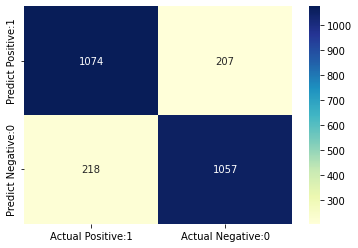

In [ ]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#Informe de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1281
           1       0.84      0.83      0.83      1275

    accuracy                           0.83      2556
   macro avg       0.83      0.83      0.83      2556
weighted avg       0.83      0.83      0.83      2556



In [ ]:
#Precisión de la clasificación
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8337


In [ ]:
#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1663


La precisión puede definirse como el porcentaje de resultados positivos predichos correctamente de todos los resultados positivos predichos. 
Puede darse como la relación entre los verdaderos positivos (TP) y la suma de los verdaderos y falsos positivos (TP + FP). S
e refiere más a la clase positiva que a la negativa. Matemáticamente, la precisión puede definirse como la relación entre TP y (TP + FP).


In [ ]:
# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8384


**Recall**

Puede definirse como el porcentaje de resultados positivos correctamente predichos de todos los resultados positivos reales. 

Puede darse como la relación entre los verdaderos positivos (TP) y la suma de los verdaderos positivos y los falsos negativos (TP + FN). 

La recuperación también se denomina sensibilidad. La recuperación identifica la proporción de positivos reales predichos correctamente.


In [ ]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8313


In [ ]:
#Tasa de verdaderos positivos
#True Positive Rate is synonymous with Recall.

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8313


In [ ]:
#Tasa de falsos positivos

"""Se define como el ratio entre el número de falsos positivos y el número de negativos (reales). 
Lógicamente, el clasificador ideal tendría un FPR de cero (pues no tendría falsos positivos), 
y el peor clasificador posible tendría un FPR de uno (todos los negativos reales serían identificados erróneamente como positivos):
"""
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1638


In [ ]:
#Specificity
"""especificidad es el porcentaje de 0’s (reales) correctamente predicho. 
La especificidad también puede calcularse como 1-Tasa Falsos Positivos.
"""

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8362


In [ ]:
# ajustamos el nivel de umbral
# mostrar las 10 primeras probabilidades predichas de dos clases - 0 y 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]
y_pred_prob

array([[0.37020683, 0.62979317],
       [0.0756605 , 0.9243395 ],
       [0.55204541, 0.44795459],
       [0.40832054, 0.59167946],
       [0.46614933, 0.53385067],
       [0.99238432, 0.00761568],
       [0.06000233, 0.93999767],
       [0.58435735, 0.41564265],
       [0.07868326, 0.92131674],
       [0.5409091 , 0.4590909 ]])

Nivel de umbral de clasificación

El nivel de umbral de clasificación de 0,5.

Class 1 - probability of pobreza is predicted if probability > 0.5.
Class 0 - probability of no pobreza is predicted if probability < 0.5.

In [ ]:
# almacenar las probabilidades en un dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No POBREZA (0)', 'Prob of - POBREZA (1)'])
y_pred_prob_df

,Prob of - No POBREZA (0),Prob of - POBREZA (1)
0,0.370207,0.629793
1,0.075660,0.924340
2,0.552045,0.447955
3,0.408321,0.591679
4,0.466149,0.533851
5,0.992384,0.007616
6,0.060002,0.939998
7,0.584357,0.415643
8,0.078683,0.921317
9,0.540909,0.459091


In [ ]:
# 10 primeros probabilidades para la clase 1 - Probability of POBREZA
logreg.predict_proba(X_test)[0:10, 1]

array([0.62979317, 0.9243395 , 0.44795459, 0.59167946, 0.53385067,
       0.00761568, 0.93999767, 0.41564265, 0.92131674, 0.4590909 ])

In [ ]:
#almacenar las probabilidades previstas para la clase 1 - Probabilidad de POBREZA
y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

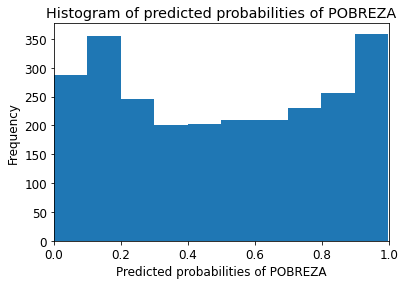

In [ ]:
# histograma 

# adjust the font size 
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of POBREZA')

# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of POBREZA')
plt.ylabel('Frequency')

**Bajar el umbral**

In [ ]:
from sklearn.preprocessing import binarize 

for i in range(1,5):
    
    cm1=0
    
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    y_pred1 = y_pred1.reshape(-1,1)
    y_pred2 = binarize(y_pred1,threshold=i/10)
    y_pred2 = np.where(y_pred2 == 1, 1, 0)
    
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[ 285  996]
 [   2 1273]] 

 with 1558 correct predictions,  

 996 Type I errors( False Positives),  

 2 Type II errors( False Negatives),  

 Accuracy score:  0.6095461658841941 

 Sensitivity:  0.9984313725490196 

 Specificity:  0.2224824355971897 



With 0.2 threshold the Confusion Matrix is  

 [[ 620  661]
 [  22 1253]] 

 with 1873 correct predictions,  

 661 Type I errors( False Positives),  

 22 Type II errors( False Negatives),  

 Accuracy score:  0.7327856025039123 

 Sensitivity:  0.9827450980392157 

 Specificity:  0.4839968774395004 



With 0.3 threshold the Confusion Matrix is  

 [[ 833  448]
 [  55 1220]] 

 with 2053 correct predictions,  

 448 Type I errors( False Positives),  

 55 Type II errors( False Negatives),  

 Accuracy score:  0.80320813771518 

 Sensitivity:  0.9568627450980393 

 Specificity:  0.6502732240437158 



With 0.4 threshold the Confusion Matrix is  

 [[ 976  305]
 [ 113 1162]] 

 with 213

Comentarios

En los problemas binarios, el umbral de 0,5 se utiliza por defecto para convertir las probabilidades predichas en predicciones de clase.

El umbral puede ajustarse para aumentar la sensibilidad o la especificidad.

La sensibilidad y la especificidad tienen una relación inversa. El aumento de una de ellas siempre disminuirá la otra y viceversa.
Podemos ver que el aumento del nivel de umbral resulta en un aumento de la precisión.

Ajustar el nivel de umbral debería ser uno de los últimos pasos que se realizan en el proceso de construcción del modelo.


**Precisión nula**

In [ ]:
y_test.value_counts()

0    1281
1    1275
Name: pobreza, dtype: int64

In [ ]:
# comprobar la precisión nula
null_accuracy = (1281/(1281+1275))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5012


La presición del modelo es 0.8337 y la precisión nula es 0.5012.

**Curva ROC**

Otra herramienta para medir visualmente el rendimiento del modelo de clasificación es la curva ROC. 
Curva ROC significa Curva de Característica Operativa del Receptor. 
Una curva ROC es un gráfico que muestra el rendimiento de un modelo de clasificación en varios niveles de umbral de clasificación.

La curva ROC traza la tasa de verdaderos positivos (TPR) frente a la tasa de falsos positivos (FPR) en varios niveles de umbral.

La tasa de verdaderos positivos (TPR) también se denomina recuperación. Se define como la relación entre TP y (TP + FN).

La tasa de falsos positivos (FPR) se define como la relación entre FP y (FP + TN).

En la curva ROC, nos centraremos en la TPR (tasa de verdaderos positivos) y la FPR (tasa de falsos positivos) de un solo punto. 
Esto nos dará el rendimiento general de la curva ROC que consiste en el TPR y el FPR en varios niveles de umbral. Así, una curva ROC traza el TPR frente al FPR a diferentes niveles de umbral de clasificación. Si bajamos los niveles de umbral, puede que se clasifiquen más elementos como positivos. Aumentará tanto los Verdaderos Positivos (TP) como los Falsos Positivos (FP).


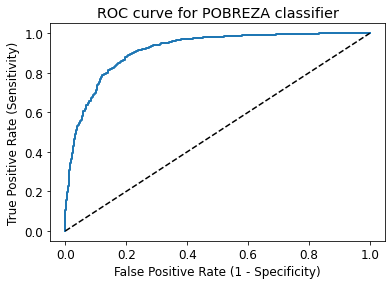

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for POBREZA classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()


In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9151


Comentarios

El AUC del ROC es un resumen numérico del rendimiento del clasificador. Cuanto mayor sea el valor, mejor será el clasificador.

El ROC AUC de nuestro modelo se aproxima a 1. Por lo que se puede decir que estaría haciendo un buen trabajo al predecir si HAY POBREZA o no.

### **Evaluación**

In [ ]:
# calculate cross-validated ROC AUC 
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8918


In [ ]:
# Validación cruzada k-fold 
# Aplicación de la validación cruzada por quintuplicado

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.80050293 0.81139983 0.80536913 0.8238255  0.79614094]


In [ ]:
#Podemos resumir la precisión de la validación cruzada calculando su media.
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8074


La puntuación del modelo original es de 0.8337. 

La puntuación media de la validación cruzada es de 0.8074. 

Por lo tanto, podemos concluir que la validación cruzada no mejora el rendimiento.

**Chequeamos overfitting y underfitting**

Comparamos la precisión del conjunto de entrenamiento y del conjunto de prueba.

In [ ]:
y_pred_train = logreg.predict(X_train)
y_pred_train

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8175


In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8175
Test set score: 0.8337


La precisión del conjunto de entrenamiento es de 0,8337, mientras que la del conjunto de prueba es de 0,8175. Estos dos valores son bastante comparables. Por lo tanto, no hay problema de sobreajuste.

En la regresión logística, utilizamos el valor por defecto de C = 1. Proporciona un buen rendimiento con una precisión de aproximadamente el 85% tanto en el conjunto de entrenamiento como en el de prueba. Pero el rendimiento del modelo tanto en el conjunto de entrenamiento como en el de prueba son muy comparables. Puede que se trate de un caso de infraajuste.

Modificamos C y ajustamos un modelo más flexible.

In [ ]:
# ajustamos el modelo de Regresion logística con C=100

# instanciamos el modelo
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)

# ajustamos el modelo
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [ ]:
print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.9666
Test set score: 0.9710


Podemos ver que C=100 da como resultado una mayor precisión en el conjunto de pruebas y en el conjunto de entrenamiento. Por lo tanto, podemos concluir que un modelo más complejo debería funcionar mejor.

Ahora investigaremos qué ocurre si utilizamos un modelo más regularizado que el valor por defecto de C=1, estableciendo C=0,01.


In [ ]:
# ajustamos el modelo de regresión logarítmica con C=001

# instanciamos el modelo
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)

# ajustamos
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [ ]:
print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.7496
Test set score: 0.7852


Como vemos, si utilizamos un modelo más regularizado estableciendo C=0,01, tanto la precisión del conjunto de entrenamiento como la del conjunto de prueba disminuyen en relación con los parámetros por defecto.

**Optimización de hiperparámetros mediante GridSearch CV**

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]

grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [ ]:
# examinar los parámetros del mejor modelos

# mejor puntuación obtenida durante la GridSearchCV
print('Mejor puntuación GridSearch CV: {:.4f}\n\n'.format(grid_search.best_score_))

# mostrar los parámetros que dan los mejores resultados
print('Parámetros que dan los mejores resultados :','\n\n', (grid_search.best_params_))

# estimador que fue elegido por el GridSearch
print('\n\nEstimador elegido:','\n\n', (grid_search.best_estimator_))

Mejor puntuación GridSearch CV: 0.9837


Parámetros que dan los mejores resultados : 

 {'C': 1000}


Estimador elegido: 

 LogisticRegression(C=1000, random_state=0, solver='liblinear')


In [ ]:
# calcular la puntuación CV de GridSearch en el conjunto de pruebas

print('Puntuación del CV de GridSearch en test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

Puntuación del CV de GridSearch en test set: 0.9859


Comentarios

La precisión de la prueba de nuestro modelo original es de 0,8337, mientras que la precisión de GridSearch CV es de 0,9859.
Podemos ver que GridSearch CV mejora el rendimiento de este modelo en particular.






---



# **Experimento 2**

Vamos a correr nuevamente el modelo con los resultados obtenidos en GridSearch CV del experimento 1.

Estimador elegido: 

LogisticRegression(C=1000, random_state=0, solver='liblinear')

In [ ]:
# instanciamos
logreg = LogisticRegression(C=1000, solver='liblinear', random_state=0)

# modelo
logreg.fit(X_train, y_train)

LogisticRegression(C=1000, random_state=0, solver='liblinear')

In [ ]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
# probabilidad 0 - no probreza

logreg.predict_proba(X_test)[:,0]

array([7.66160110e-02, 1.44124407e-01, 8.49763964e-01, ...,
       1.25252922e-04, 8.48818574e-01, 4.90336245e-02])

In [ ]:
# probabilidad 1 - pobreza

logreg.predict_proba(X_test)[:,1]

array([0.92338399, 0.85587559, 0.15023604, ..., 0.99987475, 0.15118143,
       0.95096638])

### **Métricas - Exp 2**

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9859


**Matriz de confusión**

In [ ]:
# Matriz de confusión

#from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1252   29]
 [   7 1268]]

True Positives(TP) =  1252

True Negatives(TN) =  1268

False Positives(FP) =  29

False Negatives(FN) =  7


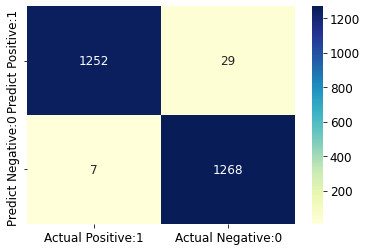

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#Informe de clasificación
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1281
           1       0.98      0.99      0.99      1275

    accuracy                           0.99      2556
   macro avg       0.99      0.99      0.99      2556
weighted avg       0.99      0.99      0.99      2556



In [ ]:
#Precisión de la clasificación
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9859


In [ ]:
#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0141


In [ ]:
# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9774


In [ ]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9944


In [ ]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9944


In [ ]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0224


In [ ]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9776


In [ ]:
# ajustamos el nivel de umbral
# mostrar las 10 primeras probabilidades predichas de dos clases - 0 y 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[7.66160110e-02, 9.23383989e-01],
       [1.44124407e-01, 8.55875593e-01],
       [8.49763964e-01, 1.50236036e-01],
       [5.99237452e-02, 9.40076255e-01],
       [7.30247618e-01, 2.69752382e-01],
       [1.00000000e+00, 1.46143257e-27],
       [2.75620830e-03, 9.97243792e-01],
       [1.28508356e-02, 9.87149164e-01],
       [2.45628135e-06, 9.99997544e-01],
       [9.99933081e-01, 6.69190648e-05]])

In [ ]:
# almacenar las probabilidades en un dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No POBREZA (0)', 'Prob of - POBREZA (1)'])

y_pred_prob_df

,Prob of - No POBREZA (0),Prob of - POBREZA (1)
0,0.076616,9.233840e-01
1,0.144124,8.558756e-01
2,0.849764,1.502360e-01
3,0.059924,9.400763e-01
4,0.730248,2.697524e-01
5,1.000000,1.461433e-27
6,0.002756,9.972438e-01
7,0.012851,9.871492e-01
8,0.000002,9.999975e-01
9,0.999933,6.691906e-05


In [ ]:
# 10 primeros probabilidades para la clase 1 - Probability of POBREZA
logreg.predict_proba(X_test)[0:10, 1]

array([9.23383989e-01, 8.55875593e-01, 1.50236036e-01, 9.40076255e-01,
       2.69752382e-01, 1.46143257e-27, 9.97243792e-01, 9.87149164e-01,
       9.99997544e-01, 6.69190648e-05])

In [ ]:
#almacenar las probabilidades previstas para la clase 1 - Probabilidad de POBREZA
y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

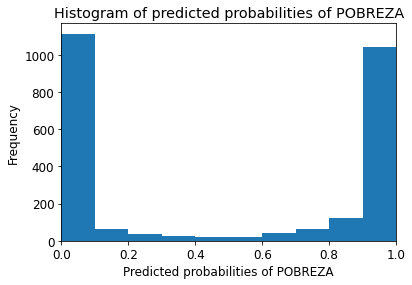

In [ ]:
# histograma 

# adjust the font size 
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of POBREZA')

# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of POBREZA')
plt.ylabel('Frequency')

**Bajar el umbral**

In [ ]:
#from sklearn.preprocessing import binarize 

for i in range(1,5):
    
    cm1=0
    
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    y_pred1 = y_pred1.reshape(-1,1)
    y_pred2 = binarize(y_pred1,threshold=i/10)
    y_pred2 = np.where(y_pred2 == 1, 1, 0)
    
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[1114  167]
 [   0 1275]] 

 with 2389 correct predictions,  

 167 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  0.9346635367762128 

 Sensitivity:  1.0 

 Specificity:  0.8696330991412958 



With 0.2 threshold the Confusion Matrix is  

 [[1176  105]
 [   0 1275]] 

 with 2451 correct predictions,  

 105 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  0.9589201877934272 

 Sensitivity:  1.0 

 Specificity:  0.9180327868852459 



With 0.3 threshold the Confusion Matrix is  

 [[1210   71]
 [   1 1274]] 

 with 2484 correct predictions,  

 71 Type I errors( False Positives),  

 1 Type II errors( False Negatives),  

 Accuracy score:  0.971830985915493 

 Sensitivity:  0.9992156862745099 

 Specificity:  0.9445745511319282 



With 0.4 threshold the Confusion Matrix is  

 [[1234   47]
 [   2 1273]] 

 with 2507 correct predictions,  

 47 Ty

**Precisión nula**

In [ ]:
y_test.value_counts()

0    1281
1    1275
Name: pobreza, dtype: int64

In [ ]:
# comprobar la precisión nula

null_accuracy = (1281/(1281+1275))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5012


**Curva ROC**

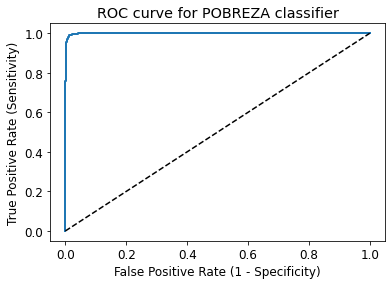

In [ ]:
# plot ROC Curve

#from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for POBREZA classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
# compute ROC AUC

ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9992


Se aproxima a 1

### **Evaluación - Exp 2**

In [ ]:
# calculate cross-validated ROC AUC 

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9992


In [ ]:
# Validación cruzada k-fold 
# Aplicación de la validación cruzada por quintuplicado

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.98407376 0.98155909 0.97986577 0.9840604  0.98489933]


In [ ]:
#Podemos resumir la precisión de la validación cruzada calculando su media.
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9829


La puntuación del modelo original es de 0.9859. La puntuación media de la validación cruzada es de 0,9829. Como en el experimento anterior, la validación cruzada no mejora el rendimiento.

**Optimización de hiperparámetros mediante GridSearch CV**

In [ ]:
#from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]


grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(C=1000, random_state=0,
                                          solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [ ]:
# examinar los parámetros del mejor modelos

# mejor puntuación obtenida durante la GridSearchCV
print('Mejor puntuación GridSearch CV: {:.4f}\n\n'.format(grid_search.best_score_))

# mostrar los parámetros que dan los mejores resultados
print('Parámetros que dan los mejores resultados :','\n\n', (grid_search.best_params_))

# estimador que fue elegido por el GridSearch
print('\n\nEstimador elegido:','\n\n', (grid_search.best_estimator_))

Mejor puntuación GridSearch CV: 0.9948


Parámetros que dan los mejores resultados : 

 {'penalty': 'l1'}


Estimador elegido: 

 LogisticRegression(C=1000, penalty='l1', random_state=0, solver='liblinear')




---



# **Experimento 3**

Ajustamos nuevamente el modelo con los datos de optimizaciñon obtenidos en el experimento 2

In [ ]:
# instanciamos
logreg = LogisticRegression(C=1000, penalty='l1', solver='liblinear', random_state=0)
# modelo
logreg.fit(X_train, y_train)

LogisticRegression(C=1000, penalty='l1', random_state=0, solver='liblinear')

In [ ]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
# probabilidad 0 - no probreza
logreg.predict_proba(X_test)[:,0]

array([2.74891221e-12, 2.26829625e-05, 1.00000000e+00, ...,
       0.00000000e+00, 1.00000000e+00, 4.91734164e-09])

In [ ]:
# probabilidad 1 - pobreza
logreg.predict_proba(X_test)[:,1]

array([1.00000000e+00, 9.99977317e-01, 7.21204323e-12, ...,
       1.00000000e+00, 5.40715808e-15, 9.99999995e-01])

**Precisión del modelo**

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9957


**Matriz de confusión**

In [ ]:
# Matriz de confusión

#from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1278    3]
 [   8 1267]]

True Positives(TP) =  1278

True Negatives(TN) =  1267

False Positives(FP) =  3

False Negatives(FN) =  8


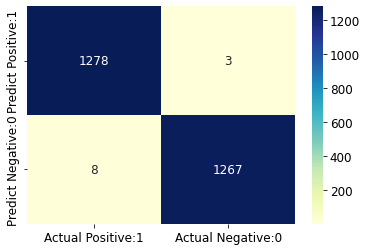

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#Informe de clasificación
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1281
           1       1.00      0.99      1.00      1275

    accuracy                           1.00      2556
   macro avg       1.00      1.00      1.00      2556
weighted avg       1.00      1.00      1.00      2556



In [ ]:
#Precisión de la clasificación
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9957


In [ ]:
#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0043


In [ ]:
# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9977


In [ ]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9938


In [ ]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9938


In [ ]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0024


In [ ]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9976


In [ ]:
# ajustamos el nivel de umbral
# mostrar las 10 primeras probabilidades predichas de dos clases - 0 y 1
y_pred_prob = logreg.predict_proba(X_test)[0:10]
y_pred_prob

array([[2.74891221e-12, 1.00000000e+00],
       [2.26829625e-05, 9.99977317e-01],
       [1.00000000e+00, 7.21204323e-12],
       [3.73034936e-14, 1.00000000e+00],
       [9.99998969e-01, 1.03074681e-06],
       [1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.50368250e-57]])

In [ ]:
# almacenar las probabilidades en un dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No POBREZA (0)', 'Prob of - POBREZA (1)'])
y_pred_prob_df

,Prob of - No POBREZA (0),Prob of - POBREZA (1)
0,2.748912e-12,1.000000e+00
1,2.268296e-05,9.999773e-01
2,1.000000e+00,7.212043e-12
3,3.730349e-14,1.000000e+00
4,9.999990e-01,1.030747e-06
5,1.000000e+00,0.000000e+00
6,0.000000e+00,1.000000e+00
7,0.000000e+00,1.000000e+00
8,0.000000e+00,1.000000e+00
9,1.000000e+00,4.503683e-57


In [ ]:
# 10 primeros probabilidades para la clase 1 - Probability of POBREZA
logreg.predict_proba(X_test)[0:10, 1]

array([1.00000000e+00, 9.99977317e-01, 7.21204323e-12, 1.00000000e+00,
       1.03074681e-06, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 4.50368250e-57])

In [ ]:
#almacenar las probabilidades previstas para la clase 1 - Probabilidad de POBREZA
y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

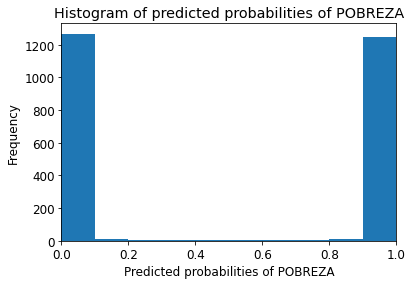

In [ ]:
# histograma 
# adjust the font size 
plt.rcParams['font.size'] = 12
# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of POBREZA')
# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Predicted probabilities of POBREZA')
plt.ylabel('Frequency')

**Bajar el umbral**

In [ ]:
#from sklearn.preprocessing import binarize 


for i in range(1,5):
    
    cm1=0
    
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    y_pred1 = y_pred1.reshape(-1,1)
    y_pred2 = binarize(y_pred1,threshold=i/10)
    y_pred2 = np.where(y_pred2 == 1, 1, 0)
    
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[1264   17]
 [   4 1271]] 

 with 2535 correct predictions,  

 17 Type I errors( False Positives),  

 4 Type II errors( False Negatives),  

 Accuracy score:  0.9917840375586855 

 Sensitivity:  0.9968627450980392 

 Specificity:  0.9867291178766588 



With 0.2 threshold the Confusion Matrix is  

 [[1274    7]
 [   4 1271]] 

 with 2545 correct predictions,  

 7 Type I errors( False Positives),  

 4 Type II errors( False Negatives),  

 Accuracy score:  0.9956964006259781 

 Sensitivity:  0.9968627450980392 

 Specificity:  0.994535519125683 



With 0.3 threshold the Confusion Matrix is  

 [[1276    5]
 [   6 1269]] 

 with 2545 correct predictions,  

 5 Type I errors( False Positives),  

 6 Type II errors( False Negatives),  

 Accuracy score:  0.9956964006259781 

 Sensitivity:  0.9952941176470588 

 Specificity:  0.9960967993754879 



With 0.4 threshold the Confusion Matrix is  

 [[1276    5]
 [   8 1267]] 

 with 2543 corr

**Curva ROC**

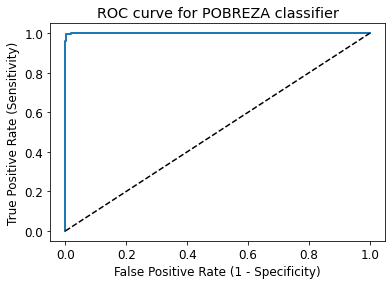

In [ ]:
# plot ROC Curve

#from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for POBREZA classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
# compute ROC AUC

ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9999


In [ ]:
# calculate cross-validated ROC AUC 

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9999


In [ ]:
# Validación cruzada k-fold 
# Aplicación de la validación cruzada por quintuplicado

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.99580889 0.99497066 0.99244966 0.99412752 0.9966443 ]


In [ ]:
#Podemos resumir la precisión de la validación cruzada calculando su media.
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9948


La puntuación del modelo original es de 0,9957. La puntuación media de la validación cruzada es de 0,9948 por lo que no mejora el rendimiento.